<a href="https://colab.research.google.com/github/NeroMipt/ML_MIPT/blob/main/hometask/task1-1/generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zlib import crc32
import numpy as np

types = ['regression', 'classification']
datasets = {'regression': [{'name': 'Servo Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Servo'},
                           {'name': 'Forest Fires Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Forest+Fires'},
                           {'name': 'Boston Housing Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston'},
                           {'name': 'Diabetes Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'}],
            'classification': [{'name': 'Spambase Data Set',
                                'url': 'https://archive.ics.uci.edu/ml/datasets/Spambase'},
                               {'name': 'Wine Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine'},
                               {'name': 'Breast Cancer Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer'},
                               {'name': 'MNIST',
                                'url': 'http://yann.lecun.com/exdb/mnist/'}]}
methods = {'regression': ['Линейная регрессия',
                          'Перцептрон'],
           'classification': ['Логистическая регрессия',
                              'Перцептрон']}
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
task['id'] = crc32(task['mail'].encode('utf-8'))
np.random.seed(task['id'])
task['type'] = np.random.choice(types)
task['dataset'] = np.random.choice(datasets[task['type']])
task['method'] = np.random.choice(
    methods[task['type']], size=2, replace=False).tolist()


task

Enter your mail: bokshanskii.ev@phystech.edu


{'mail': 'bokshanskii.ev@phystech.edu',
 'id': 2716284521,
 'type': np.str_('classification'),
 'dataset': {'name': 'Breast Cancer Data Set',
  'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer'},
 'method': ['Перцептрон', 'Логистическая регрессия']}

In [1]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)

In [3]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Создание DataFrame для удобства
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['diagnosis'] = df['target'].map({0: 'malignant', 1: 'benign'})

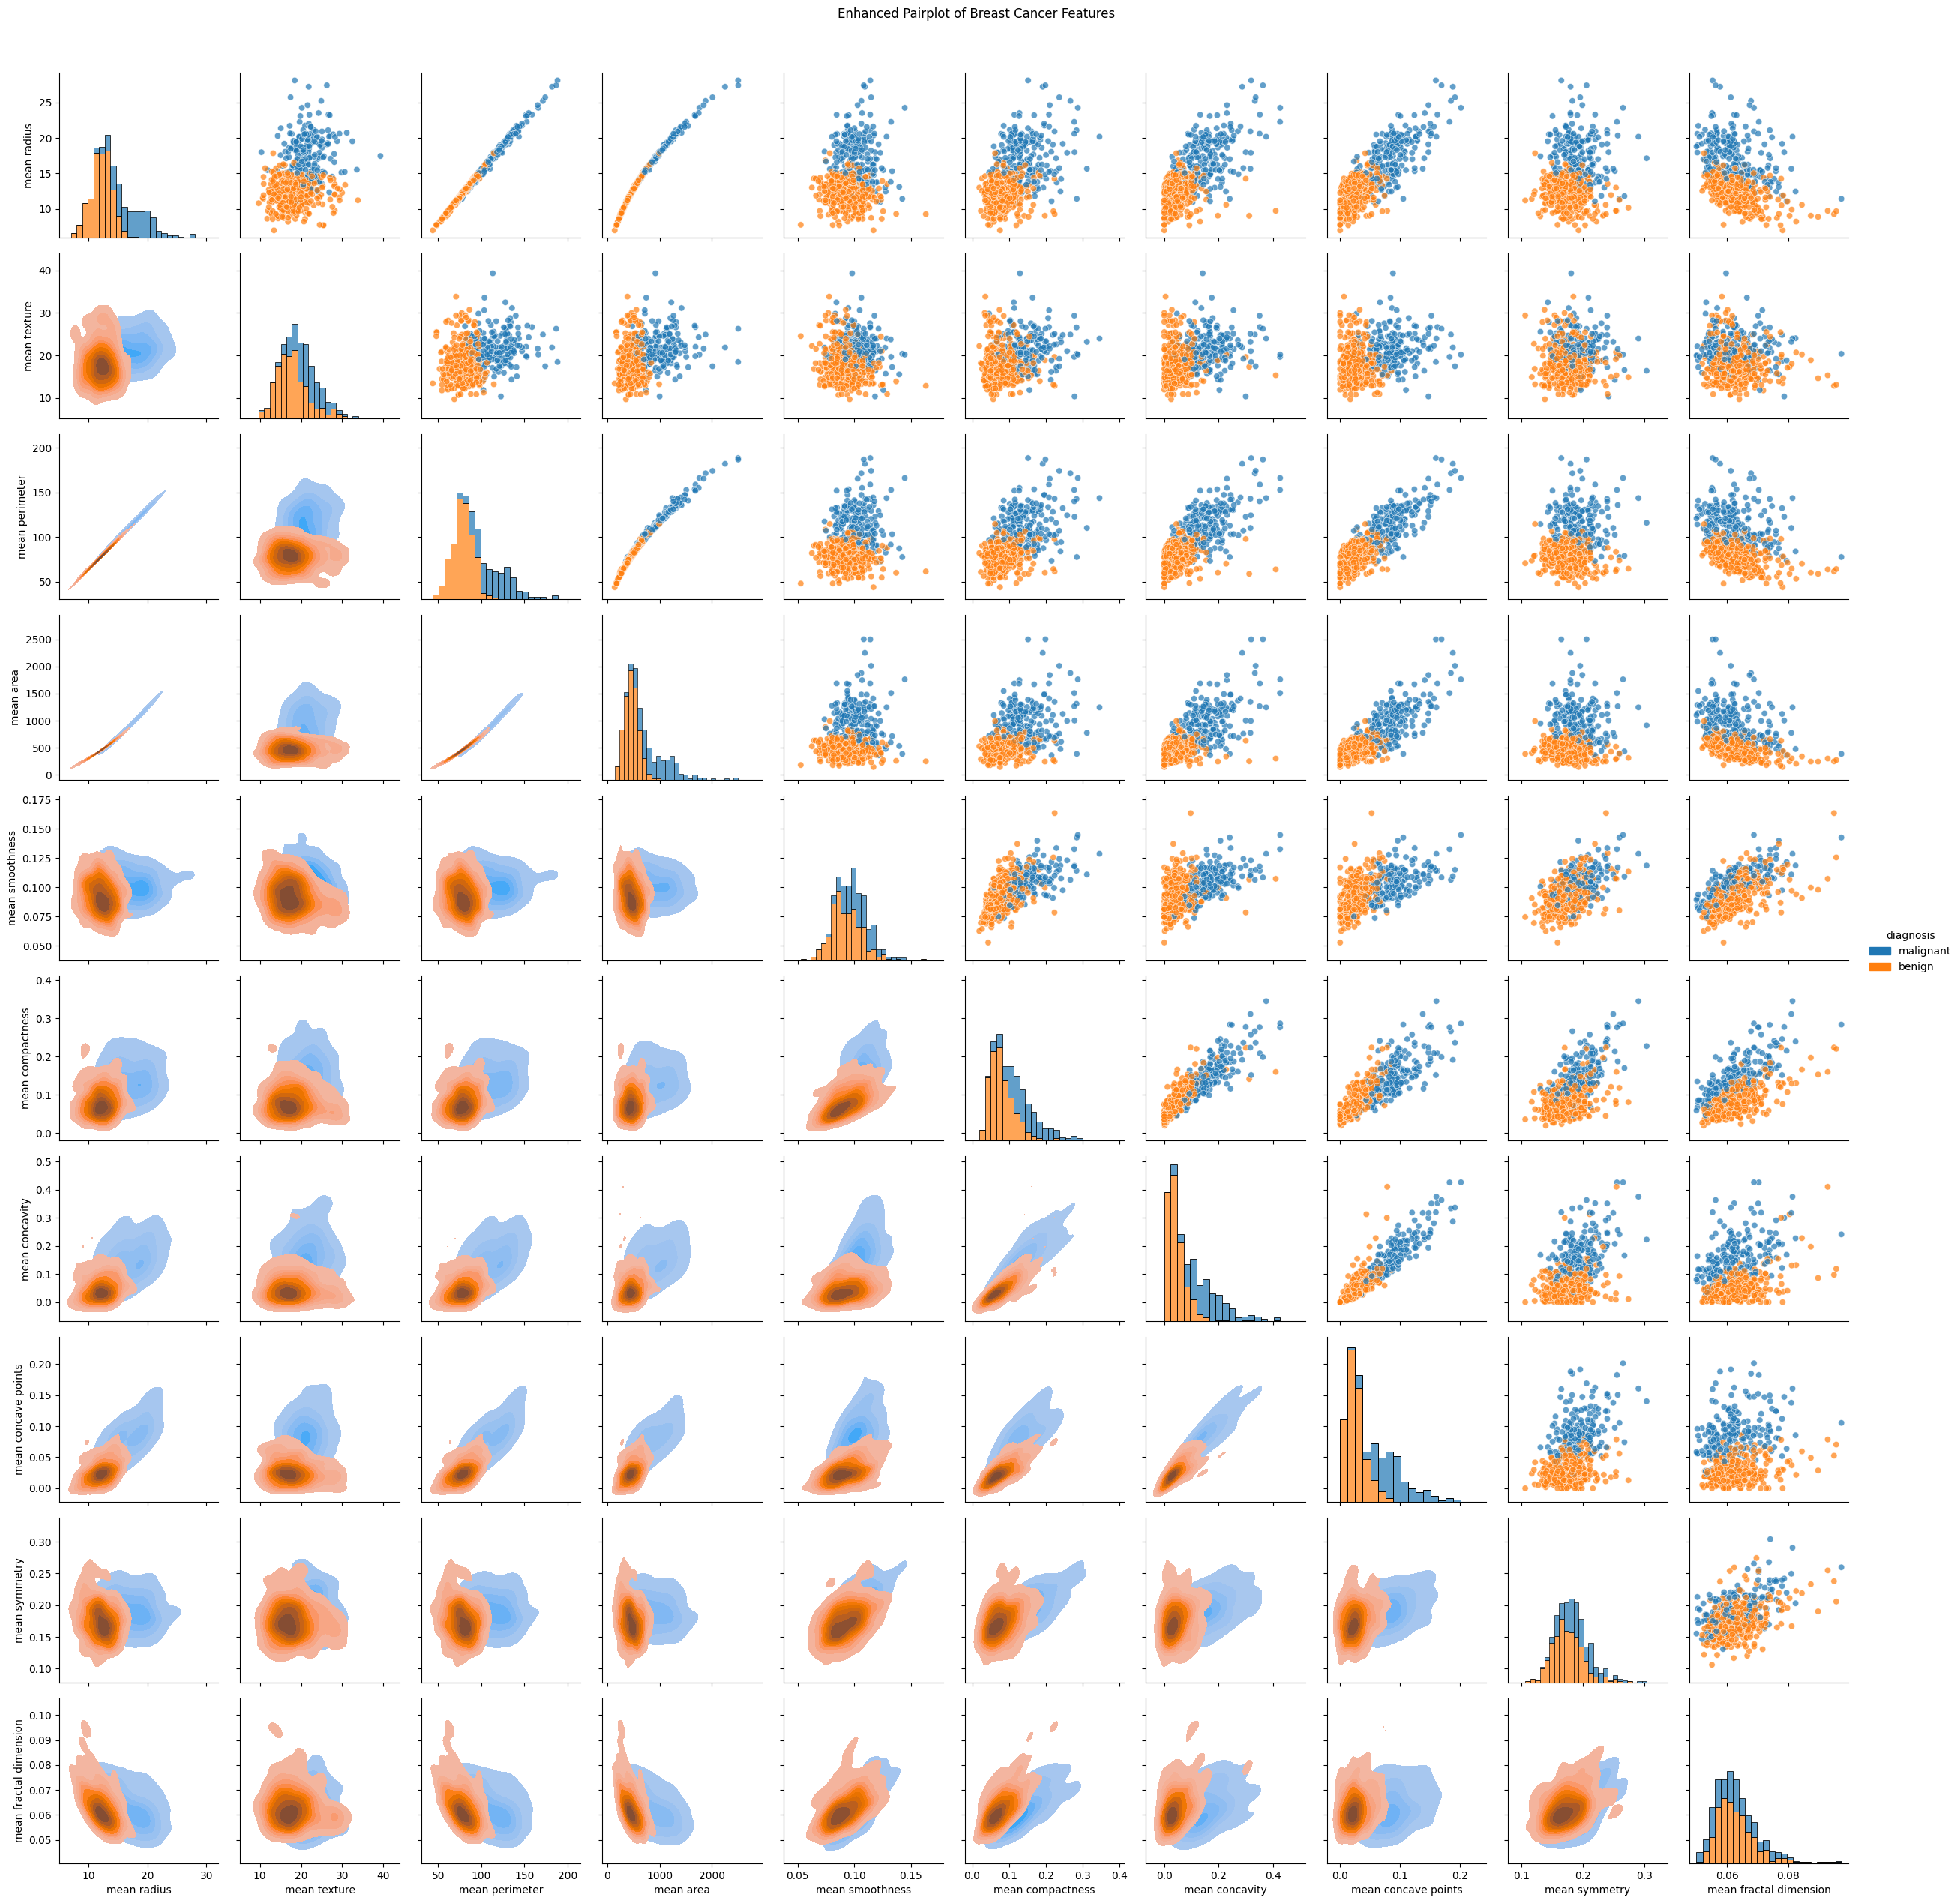

In [ ]:
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']

# Более компактный pairplot с настройками
g = sns.PairGrid(df[selected_features + ['diagnosis']], hue='diagnosis', palette='tab10')
g.map_upper(sns.scatterplot, alpha=0.7)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, alpha=0.7, multiple='stack')
g.add_legend()
plt.suptitle('Enhanced Pairplot of Breast Cancer Features', y=1.02)
plt.show()


Numerical features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


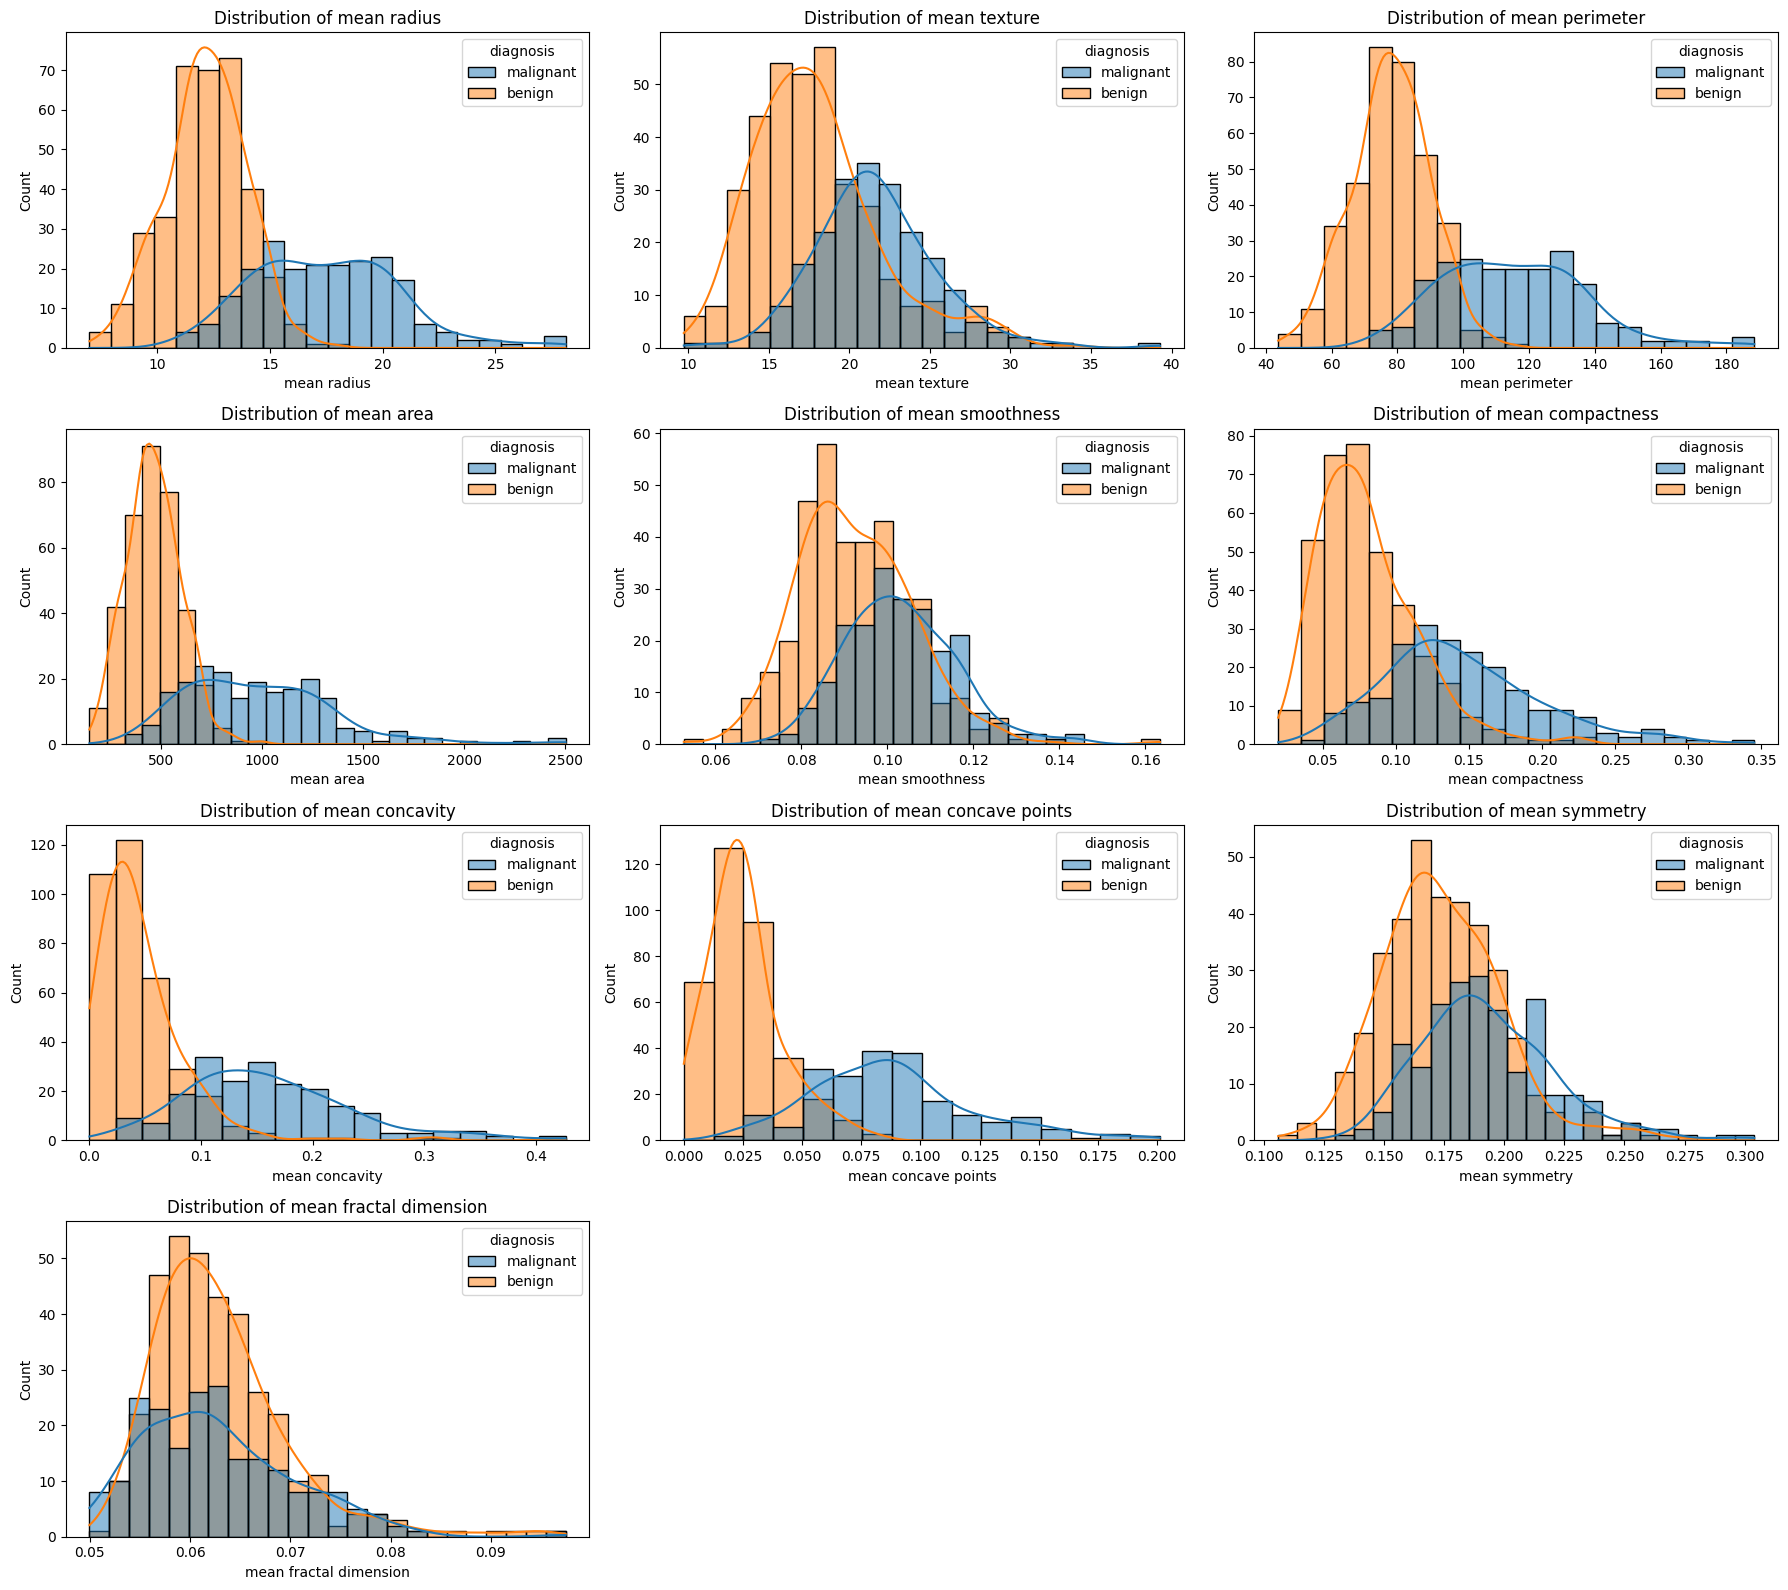

In [16]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

numerical_features.remove('target')


print("\nNumerical features:", numerical_features)


features_to_plot = numerical_features[:10] # Plotting first 10 numerical features

n_cols = 3
n_rows = (len(features_to_plot) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4))
for i, col in enumerate(features_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=df, x=col, kde=True, hue='diagnosis')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



In [18]:
from sklearn.preprocessing import StandardScaler


numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('target')


print("Numerical features to normalize:", numerical_features)


df_processed = df.copy()

scaler = StandardScaler()
df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])


df_processed['target'] = df['target']


display(df_processed.head())

Numerical features to normalize: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0,malignant
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0,malignant
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0,malignant
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0,malignant
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0,malignant


In [19]:
from sklearn.model_selection import train_test_split


X_processed = df_processed.drop(columns=['target', 'diagnosis'])

y_processed = df_processed['target']


random_state_value = 2716284521

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=random_state_value
)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


In [20]:
from sklearn.linear_model import Perceptron, LogisticRegression


random_state_value = 2716284521


perceptron_model = Perceptron(random_state=random_state_value)


logistic_regression_model = LogisticRegression(random_state=random_state_value)


perceptron_model.fit(X_train, y_train)

logistic_regression_model.fit(X_train, y_train)

print("Ready")

Ready


**Reasoning**:
Import GridSearchCV, define parameter grids for Perceptron and Logistic Regression, instantiate GridSearchCV for both models with specified scoring and cross-validation, and fit them to the training data. Then, print the best hyperparameters for each model and store the best estimators.



In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron, LogisticRegression


perceptron_param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1'],
    'l1_ratio': [0.15, 0.5, 0.85]
}


perceptron_grid_search = GridSearchCV(estimator=Perceptron(random_state=random_state_value, max_iter=1000, tol=1e-3),
                                      param_grid=perceptron_param_grid,
                                      cv=5,
                                      scoring='accuracy',
                                      n_jobs=-1) # Use all available cores



perceptron_grid_search.fit(X_train, y_train)



print("Best hyperparameters for Perceptron:", perceptron_grid_search.best_params_)


logistic_regression_param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear']
}


logistic_regression_grid_search = GridSearchCV(estimator=LogisticRegression(random_state=random_state_value, max_iter=1000),
                                               param_grid=logistic_regression_param_grid,
                                               cv=5,
                                               scoring='accuracy',
                                               n_jobs=-1)


logistic_regression_grid_search.fit(X_train, y_train)

print("Best hyperparameters for Logistic Regression:", logistic_regression_grid_search.best_params_)

best_perceptron_model = perceptron_grid_search.best_estimator_
best_logistic_regression_model = logistic_regression_grid_search.best_estimator_


Best hyperparameters for Perceptron: {'alpha': 0.0001, 'l1_ratio': 0.15, 'penalty': 'l1'}
Best hyperparameters for Logistic Regression: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


**Reasoning**:
Correct the variable name `y_pred_regression` to `y_pred_logistic_regression` in the metrics calculation for Logistic Regression and re-execute the code to calculate and print the evaluation metrics.



In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


y_pred_perceptron = best_perceptron_model.predict(X_test)
y_pred_logistic_regression = best_logistic_regression_model.predict(X_test)

# Calculate evaluation metrics for Perceptron
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
precision_perceptron = precision_score(y_test, y_pred_perceptron)
recall_perceptron = recall_score(y_test, y_pred_perceptron)
f1_perceptron = f1_score(y_test, y_pred_perceptron)

# Calculate evaluation metrics for Logistic Regression
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
precision_logistic_regression = precision_score(y_test, y_pred_logistic_regression)
recall_logistic_regression = recall_score(y_test, y_pred_logistic_regression)
f1_logistic_regression = f1_score(y_test, y_pred_logistic_regression)

# Print the calculated metrics
print("Perceptron Metrics:")
print(f"  Accuracy: {accuracy_perceptron:.4f}")
print(f"  Precision: {precision_perceptron:.4f}")
print(f"  Recall: {recall_perceptron:.4f}")
print(f"  F1 Score: {f1_perceptron:.4f}")

print("\nLogistic Regression Metrics:")
print(f"  Accuracy: {accuracy_logistic_regression:.4f}")
print(f"  Precision: {precision_logistic_regression:.4f}")
print(f"  Recall: {recall_logistic_regression:.4f}")
print(f"  F1 Score: {f1_logistic_regression:.4f}")

# Get prediction probabilities for ROC AUC
y_proba_perceptron = best_perceptron_model.decision_function(X_test) # Perceptron uses decision_function
y_proba_logistic_regression = best_logistic_regression_model.predict_proba(X_test)[:, 1] # Logistic Regression uses predict_proba

# Calculate ROC AUC
roc_auc_perceptron = roc_auc_score(y_test, y_proba_perceptron)
roc_auc_logistic_regression = roc_auc_score(y_test, y_proba_logistic_regression)

# Print ROC AUC
print("\nPerceptron ROC AUC:")
print(f"  ROC AUC: {roc_auc_perceptron:.4f}")

print("\nLogistic Regression ROC AUC:")
print(f"  ROC AUC: {roc_auc_logistic_regression:.4f}")

Perceptron Metrics:
  Accuracy: 0.9649
  Precision: 0.9853
  Recall: 0.9571
  F1 Score: 0.9710

Logistic Regression Metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Perceptron ROC AUC:
  ROC AUC: 0.9955

Logistic Regression ROC AUC:
  ROC AUC: 1.0000


In [24]:
# 1. Compare the calculated metrics
print("--- Model Performance Comparison ---")
print("Metric         | Perceptron | Logistic Regression")
print("-------------------------------------------------")
print(f"Accuracy       | {accuracy_perceptron:.4f}   | {accuracy_logistic_regression:.4f}")
print(f"Precision      | {precision_perceptron:.4f}   | {precision_logistic_regression:.4f}")
print(f"Recall         | {recall_perceptron:.4f}   | {recall_logistic_regression:.4f}")
print(f"F1 Score       | {f1_perceptron:.4f}   | {f1_logistic_regression:.4f}")
print(f"ROC AUC        | {roc_auc_perceptron:.4f}   | {roc_auc_logistic_regression:.4f}")
print("-------------------------------------------------")

print("Основываясь на полученных данных, Логистическая регрессия оказалась лучше Перцептрона")



print("Это может быть связано с тем, что датасет линейно разделим, что позволяет логистической регрессии найти оптимальную решеник.")




--- Model Performance Comparison ---
Metric         | Perceptron | Logistic Regression
-------------------------------------------------
Accuracy       | 0.9649   | 1.0000
Precision      | 0.9853   | 1.0000
Recall         | 0.9571   | 1.0000
F1 Score       | 0.9710   | 1.0000
ROC AUC        | 0.9955   | 1.0000
-------------------------------------------------
Основываясь на полученных данных, Логистическая регрессия оказалась лучше Перцептрона
Это может быть связано с тем, что датасет линейно разделим, что позволяет логистической регрессии найти оптимальную решеник.
